In [1]:
#ikke "from qiskit import *". Dårlig notasjon
import qiskit as q #q er en bokstav vi velger for enkel notasjon senere
#for styling fra jupyter
%matplotlib inline

In [2]:
# variabel = q.QuantumCircuit(antall kvantebits, antall klassiske bits)
circuit = q.QuantumCircuit(2,2)
# eventuelt variabel = QuantumCircuit(antall kvantebits), men da funker ikke measure()

In [ ]:
# setter kretser på ulike kvantebits
# valgtKrets.gate(tall på valgt kvantebit)
circuit.x(0) #not-gate, flipper 1 til 0 og 0 til 1
circuit.cx(0,1) # controlled not-gate, flipper HVIS kontrollen er 1. Første tall er kontrollen
circuit.measure([0,1],[0,1]) #valgtKrets.measure([kvantebit, evt. en annen, en til],[klassisk bit, evt. en annen, en til])
circuit.draw(output="mpl") #output = "mpl" git en annen type tegning. Ellers la parantesen stå

# Importerer IBMQ

In [4]:
#Vi må importere IBMQ, ha kontoen klar, få "ibm-q" provider, bestemme backend (kvantedatamaskin)

from qiskit import IBMQ

#IBMQ.save_account("token")
IBMQ.save_account("03d396a71bf17400015d716f887c0fb71c9c4bf584864e0e1ee677e1f4979294513431873f3eb9a074bc05de0a708645d97432d6514ae287d1ecfa697ec32e6e")

configrc.store_credentials:WARNING:2021-07-22 15:59:04,320: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider("ibm-q")

for i in provider.backends():
    try:
        antall_qubits = len(i.properties().qubits)
    except:
        antall_qubits = "simulated"
        
    print(f"{i.name()} has {i.status().pending_jobs} queued and {antall_qubits} qubits")
    
#metoden backends() til "ibm-q" er en array med kvantedatamaskiner
#metoder: name() status() properties() properties().qubits


ibmq_quito has 9 queued and 5 qubits
ibmq_qasm_simulator has 2 queued and simulated qubits
ibmq_armonk has 1 queued and 1 qubits
ibmqx2 has 1 queued and 5 qubits
simulator_mps has 2 queued and simulated qubits
simulator_statevector has 2 queued and simulated qubits
ibmq_bogota has 4 queued and 5 qubits
ibmq_santiago has 39 queued and 5 qubits
ibmq_belem has 0 queued and 5 qubits
ibmq_lima has 10 queued and 5 qubits
simulator_extended_stabilizer has 2 queued and simulated qubits
simulator_stabilizer has 2 queued and simulated qubits
ibmq_manila has 41 queued and 5 qubits


## se jobstatus

In [7]:
from qiskit.tools.monitor import job_monitor # viser oss hvilken plass vi har i køen

backend = provider.get_backend("ibmqx2")
job = q.execute(circuit, backend=backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


# vis resultat med histogram

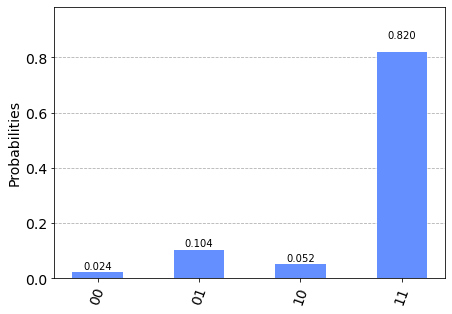

In [8]:
from qiskit.tools.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])